In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Линейная регрессия

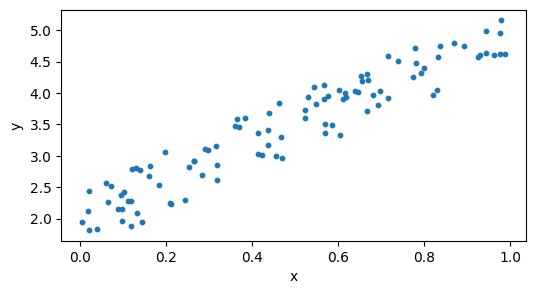

In [57]:
np.random.seed(0)

x = np.random.rand(100,1)
y = 2 + 3 * x + (np.random.rand(100,1) - 0.5)

plt.figure(figsize=(6,3))
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Допустим, параметры неизвестны. 

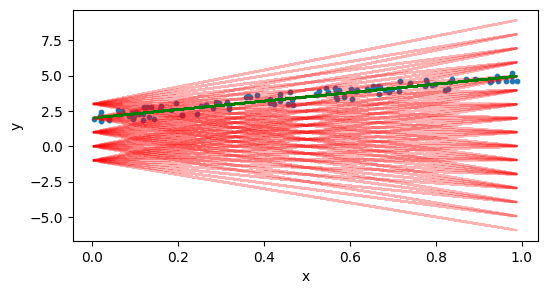

In [58]:
plt.figure(figsize=(6,3))
plt.scatter(x, y, s=10)
for w in np.arange(-5.0, 7.0, 1):
    for b in [-1, 0, 1,2, 3]:
        y_pred = b + w * x
        plt.plot(x, y_pred, color='r', alpha=0.3)

plt.plot(x, 2 + 3 * x, color="g")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Функция потерь

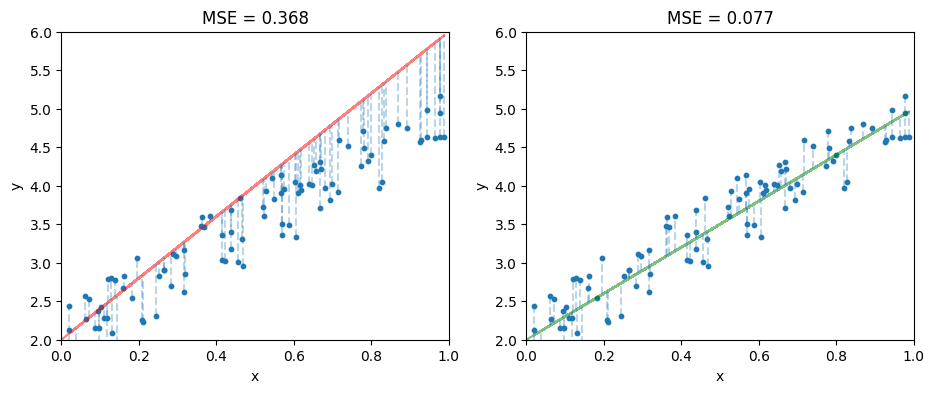

In [59]:
def plot_delta_line(ax, x, y, w, b, color='r'):
    y_pred = b + w * x

    ax.plot(x, y_pred, color=color, alpha=0.5, label=f'f(x)={w}x + {b}')

    for x_i, y_i, f_x in zip(x, y, y_pred):
        ax.vlines(x=x_i, ymin=min(f_x,y_i), ymax=max(f_x, y_i), ls='--', alpha=0.3)

    loss = np.sum((y - y_pred) ** 2) / len(x)
    ax.set_title(f'MSE = {loss:.3f}')

fig, axs = plt.subplots(1, 2, figsize=(11,4))

for ax in axs:
    ax.scatter(x, y, s=10)
    ax.set_xlim([0, 1])
    ax.set_ylim([2, 6])
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plot_delta_line(axs[0], x, y, w=4, b=2, color="r")
plot_delta_line(axs[1], x, y, w=3, b=2, color="g")

plt.show()


### МНК

Estimated coefficients:
b = 2.058 
w = 2.937
Final equation: 
y = 2.937x +2.058


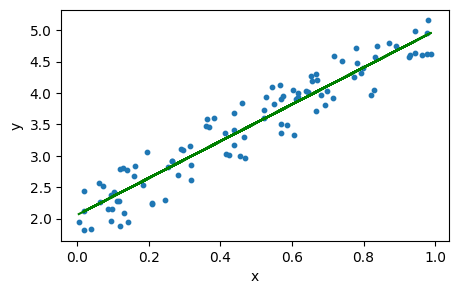

In [60]:
def estimate_coef(x, y):
    n = len(x)
    w = (n * sum(np.multiply(x, y)) - sum(x) * sum(y)) / (
        n * sum(np.multiply(x, x)) - sum(x) ** 2
    )
    b = (sum(y) - w * sum(x)) / n
    return w, b


w, b = estimate_coef(x, y)

y_pred= w * x + b

print(f"Estimated coefficients:\nb = {b[0]:.3f} \nw = {w[0]:.3f}")
print(f"Final equation: \ny = {w[0]:.3f}x +{b[0]:.3f}")

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color="g")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Поиск локального минимума

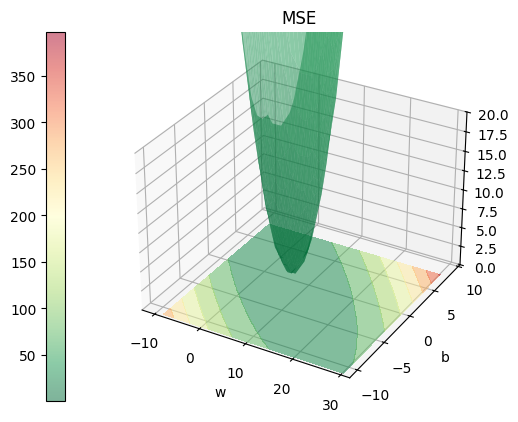

In [61]:
w = np.arange(-10, 30, 1)
b = np.arange(-10, 10, 1)

w, b = np.meshgrid(w, b)

loss = np.zeros_like(w)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        loss[i, j] = np.sum((y - (w[i, j] * x + b[i, j])) ** 2) / (len(x))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(w, b, loss, cmap=plt.cm.RdYlGn_r, alpha=0.5)

ax.contourf(w, b, loss, zdir="z", offset=-1, cmap="RdYlGn_r", alpha=0.5)
ax.set_zlim(0, 20)

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_title("MSE")

fig.colorbar(surf, location="left")
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error


def print_metrics(y_true, y_pred):
    print(f"Mean squared error: {mean_squared_error(y_true, y_pred):.3f}")
    print("Root mean squared error: ",f"{root_mean_squared_error(y_true, y_pred):.3f}")
    print(f"Mean absolute error: {mean_absolute_error(y_true, y_pred):.3f}")
    print(f"R2 score: {r2_score(y_true, y_pred):.3f}")


print_metrics(y, y_pred)


Mean squared error: 0.076
Root mean squared error:  0.276
Mean absolute error: 0.237
R2 score: 0.904


In [63]:
dataset = pd.read_csv('student_scores.csv')
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


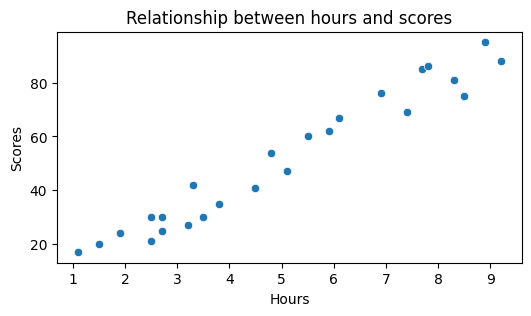

In [64]:
import seaborn as sns

plt.figure(figsize=(6,3))
sns.scatterplot(data=dataset, x='Hours', y='Scores')
plt.title('Relationship between hours and scores')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [67]:
x_train.shape

(20, 1)

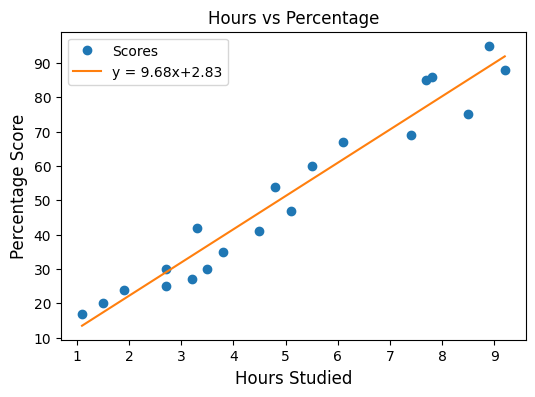

In [68]:
x_points = np.linspace(min(x_train), max(x_train), 100)
y_pred = regressor.predict(x_points)

plt.figure(figsize=(6,4))
plt.plot(x_train, y_train, 'o', label='Scores')
plt.plot(x_points,y_pred, label="y = %.2fx+%.2f" % (regressor.coef_[0], regressor.intercept_))
plt.title("Hours vs Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.ylabel("Percentage Score", size=12)
plt.legend()
plt.show()

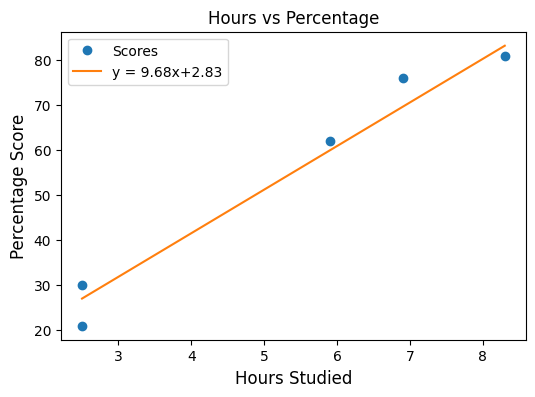

In [69]:
y_pred = regressor.predict(x_test)

x_points = np.linspace(min(x_test), max(x_test), 100)
y_pred = regressor.predict(x_points)

plt.figure(figsize=(6, 4))
plt.plot(x_test, y_test, "o", label="Scores")
plt.plot(x_points,y_pred,label="y = %.2fx+%.2f" % (regressor.coef_[0], regressor.intercept_),
)
plt.title("Hours vs Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.ylabel("Percentage Score", size=12)
plt.legend()
plt.show()

In [70]:
y_pred = regressor.predict(x_test)
print_metrics(y_test, y_pred)

Mean squared error: 18.943
Root mean squared error:  4.352
Mean absolute error: 3.921
R2 score: 0.968


## Метод градиентного спуска

#### Градиент

In [71]:
f = lambda x, y: np.sin(x*y)

x = np.linspace(0, 4, 1000)
y = np.linspace(0,4,1000)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

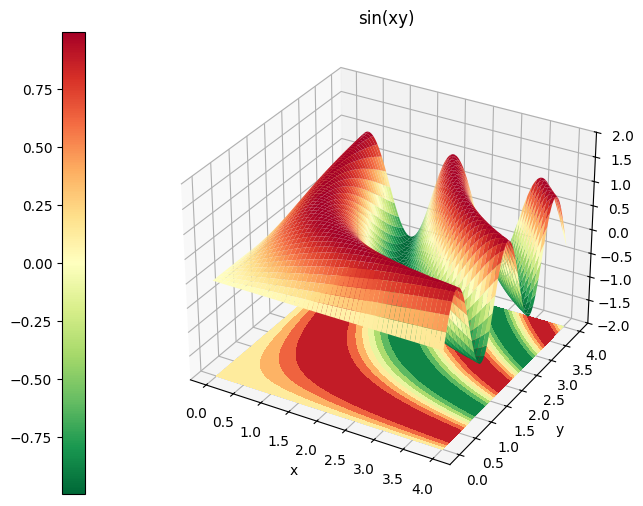

In [72]:
fig = plt.figure(figsize=(20,6))

def show_3d(xx, yy, zz, fig):
    ax = fig.add_subplot(121, projection='3d')
    surf = ax.plot_surface(xx, yy, zz, cmap=plt.cm.RdYlGn_r)

    ax.contourf(xx, yy, zz, zdir='zz',  offset=-2, cmap="RdYlGn_r")
    ax.set_zlim(-2, 2)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("sin(xy)")
    fig.colorbar(surf, location="left")


show_3d(xx, yy, zz, fig)
plt.show()

In [73]:
gradf = lambda x, y: (np.cos(x * y) * y, np.cos(x * y) * x)

xsmall = np.linspace(0, 4, 15)
ysmall = np.linspace(0, 4, 15)
xxsmall, yysmall = np.meshgrid(xsmall, ysmall)
gradx, grady = gradf(xxsmall, yysmall)

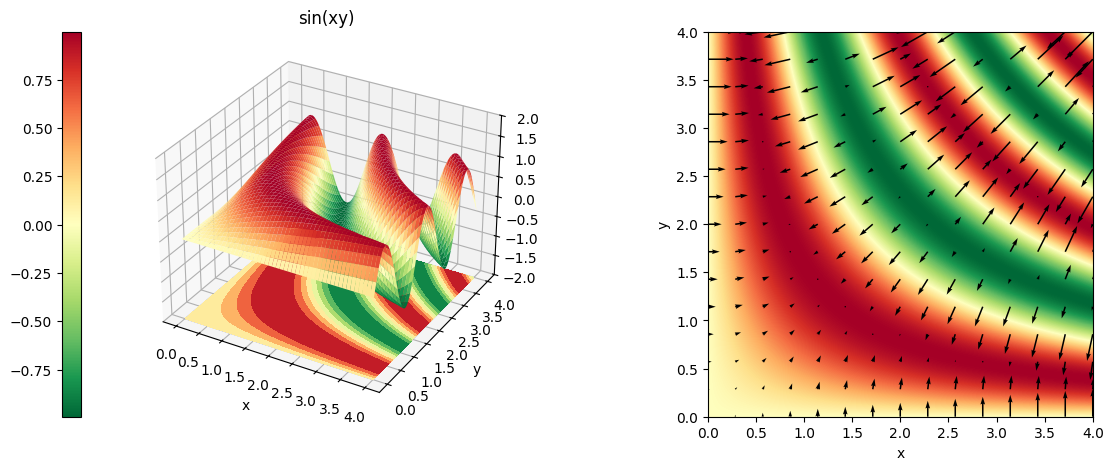

In [74]:
fig = plt.figure(figsize=(15, 5))
show_3d(xx, yy, zz, fig)

ax = fig.add_subplot(122)
ax.imshow(
    zz,
    extent=(np.min(x), np.max(x), np.min(y), np.max(y)),
    cmap="RdYlGn_r",
    origin="lower",
)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.quiver(xxsmall, yysmall, gradx, grady)
plt.show()

### Идея градиентного спуска

In [75]:
from sklearn.metrics import mean_squared_error

slopes = np.arange(5, 15, 0.5)
prediction = {f'{w}': w * x_train[: 0] + 2.83 for w in slopes}
mse = np.array([mean_squared_error(y_train, w*x_train[:, 0] + 2.83) for w in slopes])
dmse_dw = np.array([(2 * x_train[:, 0] * (w * x_train[:, 0] + 2.83 - y_train)).mean() for w in slopes])

In [76]:
def gradient(x, y, w, b):
    return 2 * (x * (w * x + b - y)).mean()

def gradient_descent(x_train, y_train, x_test, y_test, w, alpha, b=2.83, iteration=10):
    """Gradient descent for optimizing slope in simple linear regression"""
    ws = [w]
    mse_train = [mean_squared_error(y_train, w * x_train + b)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, w * x_test +  b)]
    prediction = {w: w * x_train + b}
    print(f'Iteration 0: w = {w:.2f}, Losst_train = {mse_train[0]:.2f}, Loss_test = {mse_test[0]:.2f}')

    for i in range(iteration):
        grad = gradient(x_train, y_train, w, b)
        w -= alpha * grad

        ws.append(w)
        mse_train.append(mean_squared_error(y_train, w * x_train + b))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, w * x_test + b))
        prediction[w] = w * x_train + b
        print(f'Iteration {i+1}: w = {w:.2f}, Losst_train = {mse_train[i]:.2f}, Loss_test = {mse_test[i]:.2f}')

    return ws, prediction, mse_train, dmse_train, mse_test

In [77]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.01, iteration=7)

Iteration 0: w = 5.00, Losst_train = 707.84, Loss_test = 793.54
Iteration 1: w = 7.89, Losst_train = 707.84, Loss_test = 793.54
Iteration 2: w = 9.00, Losst_train = 130.56, Loss_test = 145.80
Iteration 3: w = 9.42, Losst_train = 45.98, Loss_test = 42.65
Iteration 4: w = 9.58, Losst_train = 33.58, Loss_test = 24.38
Iteration 5: w = 9.64, Losst_train = 31.77, Loss_test = 20.49
Iteration 6: w = 9.67, Losst_train = 31.50, Loss_test = 19.46
Iteration 7: w = 9.68, Losst_train = 31.46, Loss_test = 19.13


In [78]:
def plot_mse(mse_train, mse_test):
    plt.figure(figsize=(10, 4))
    plt.title("Learning curve")
    plt.plot(mse_train, label="train")
    plt.plot(mse_test, label="test")
    plt.legend()

    plt.xlabel("iterations", fontsize=12)
    plt.ylabel("MSE Loss", fontsize=12)

    plt.grid(True)
    plt.show()

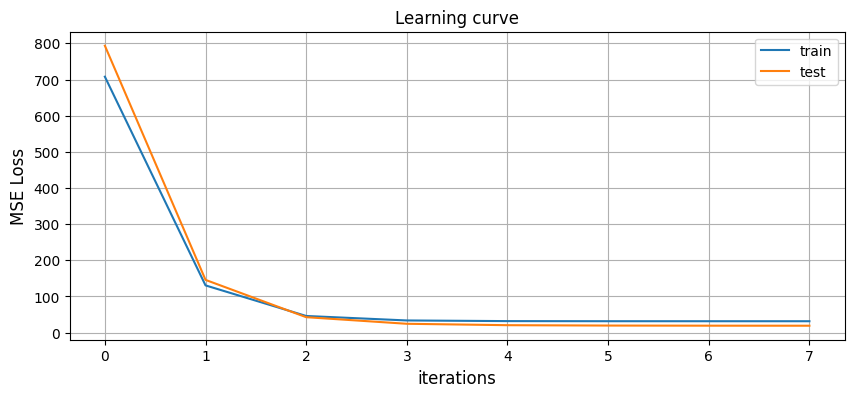

In [79]:
plot_mse(mse_train, mse_test)

#### Скорость обучения

In [80]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.0005, iteration=30)

Iteration 0: w = 5.00, Losst_train = 707.84, Loss_test = 793.54
Iteration 1: w = 5.14, Losst_train = 707.84, Loss_test = 793.54
Iteration 2: w = 5.28, Losst_train = 666.74, Loss_test = 748.16
Iteration 3: w = 5.42, Losst_train = 628.13, Loss_test = 705.49
Iteration 4: w = 5.55, Losst_train = 591.87, Loss_test = 665.36
Iteration 5: w = 5.68, Losst_train = 557.82, Loss_test = 627.61
Iteration 6: w = 5.80, Losst_train = 525.83, Loss_test = 592.12
Iteration 7: w = 5.92, Losst_train = 495.79, Loss_test = 558.73
Iteration 8: w = 6.04, Losst_train = 467.57, Loss_test = 527.33
Iteration 9: w = 6.15, Losst_train = 441.07, Loss_test = 497.79
Iteration 10: w = 6.26, Losst_train = 416.17, Loss_test = 470.01
Iteration 11: w = 6.37, Losst_train = 392.79, Loss_test = 443.88
Iteration 12: w = 6.47, Losst_train = 370.84, Loss_test = 419.29
Iteration 13: w = 6.57, Losst_train = 350.21, Loss_test = 396.16
Iteration 14: w = 6.66, Losst_train = 330.84, Loss_test = 374.40
Iteration 15: w = 6.76, Losst_train

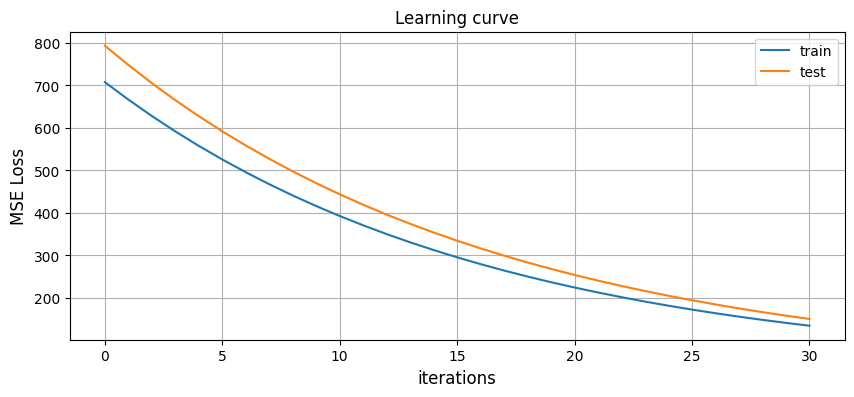

In [81]:
plot_mse(mse_train, mse_test)

За 30 итераций не достигли минимума, по графику обучения видно, что мы не вышли на плато.

In [82]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.027, iteration=15)

Iteration 0: w = 5.00, Losst_train = 707.84, Loss_test = 793.54
Iteration 1: w = 12.80, Losst_train = 707.84, Loss_test = 793.54
Iteration 2: w = 7.60, Losst_train = 331.92, Loss_test = 300.22
Iteration 3: w = 11.07, Losst_train = 164.92, Loss_test = 185.76
Iteration 4: w = 8.76, Losst_train = 90.74, Loss_test = 65.14
Iteration 5: w = 10.30, Losst_train = 57.79, Loss_test = 58.06
Iteration 6: w = 9.27, Losst_train = 43.15, Loss_test = 23.93
Iteration 7: w = 9.96, Losst_train = 36.65, Loss_test = 29.42
Iteration 8: w = 9.50, Losst_train = 33.76, Loss_test = 18.09
Iteration 9: w = 9.80, Losst_train = 32.48, Loss_test = 22.24
Iteration 10: w = 9.60, Losst_train = 31.91, Loss_test = 17.96
Iteration 11: w = 9.74, Losst_train = 31.66, Loss_test = 20.14
Iteration 12: w = 9.65, Losst_train = 31.54, Loss_test = 18.39
Iteration 13: w = 9.71, Losst_train = 31.49, Loss_test = 19.42
Iteration 14: w = 9.67, Losst_train = 31.47, Loss_test = 18.67
Iteration 15: w = 9.69, Losst_train = 31.46, Loss_test

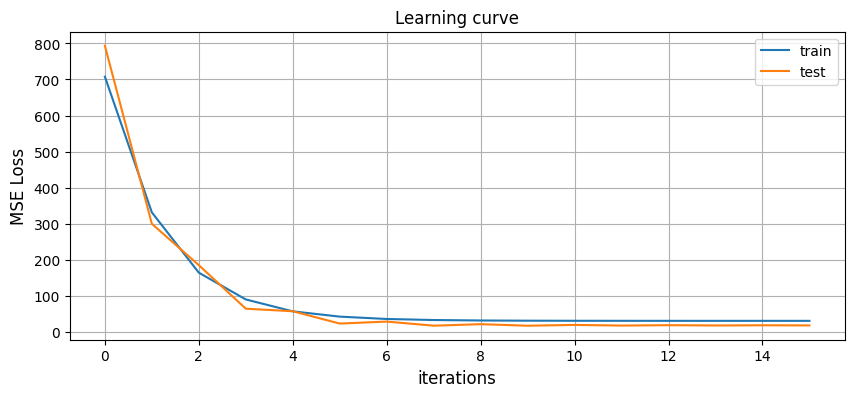

In [83]:
plot_mse(mse_train, mse_test)

In [84]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.034, iteration=5)

Iteration 0: w = 5.00, Losst_train = 707.84, Loss_test = 793.54
Iteration 1: w = 14.82, Losst_train = 707.84, Loss_test = 793.54
Iteration 2: w = 4.03, Losst_train = 847.72, Loss_test = 823.37
Iteration 3: w = 15.89, Losst_train = 1016.53, Loss_test = 1132.95
Iteration 4: w = 2.86, Losst_train = 1220.26, Loss_test = 1206.01
Iteration 5: w = 17.17, Losst_train = 1466.11, Loss_test = 1624.33


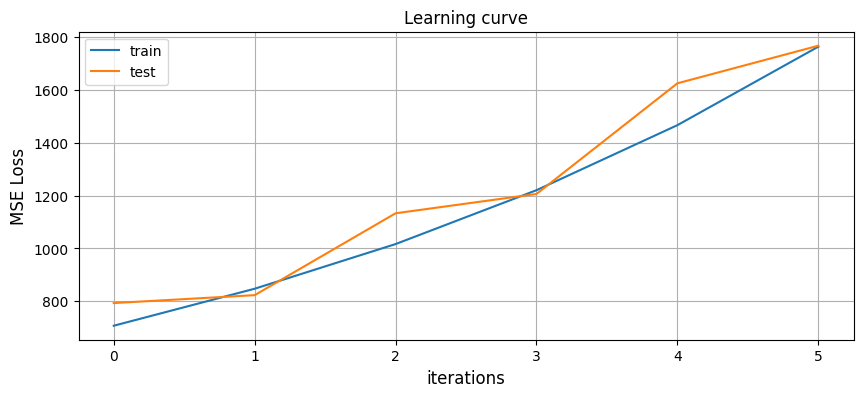

In [85]:
plot_mse(mse_train, mse_test)

### Учет смещения

In [86]:
w = np.array([[0.5], [5]])
w

array([[0.5],
       [5. ]])

In [87]:
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test =  np.hstack((np.ones((x_test.shape[0], 1)), x_test))
x_test

array([[1. , 8.3],
       [1. , 2.5],
       [1. , 2.5],
       [1. , 6.9],
       [1. , 5.9]])

In [88]:
x_train.shape, w.shape

((20, 2), (2, 1))

In [89]:
y_pred = x_test @ w
y_pred

array([[42.],
       [13.],
       [13.],
       [35.],
       [30.]])

In [90]:
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [91]:
def gradient(x, y, w):
    """Gradient of mean squared error."""
    return 2 * (x.T @ (x @ w) - x.T @ y) / len(x)


def gradient_descent(x_train, y_train, x_test, y_test, w, alpha, iteration=10):
    """Gradient descent for optimizing slope in simple linear regression"""
    # history
    ws = np.zeros((iteration + 1, 2))
    ws[0] = w[:, 0]
    mse_train = [mean_squared_error(y_train, x_train @ w)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, x_test @ w)]
    prediction = {(w[0][0], w[1][0]): x_train @ w}

    print(
        f"Iteration 0: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
        f"Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )

    for i in range(iteration):
        # adjust w based on gradient * learning rate
        grad = gradient(x_train, y_train, w)
        w -= alpha * grad  # adjust w based on gradient * learning rate
        # history
        ws[i + 1] = w[:, 0]
        mse_train.append(mean_squared_error(y_train, x_train @ w))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, x_test @ w))
        prediction[(w[0][0], w[1][0])] = x_train @ w

        print(
            f"Iteration {i+1}: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
            f"Loss_train = {mse_train[i]:.2f}, "
            f"Loss_test = {mse_test[i]:3.2f}."
        )
    return ws, prediction, mse_train, dmse_train, mse_test

In [92]:
ws, prediction, mse_train, dmse_train, mse_test = gradient_descent(x_train,y_train,x_test,y_test,w,0.01)

Iteration 0: b = 0.50, w = 5.00, Loss_train = 821.48, Loss_test = 915.80.
Iteration 1: b = 1.01, w = 8.12, Loss_train = 821.48, Loss_test = 915.80.
Iteration 2: b = 1.20, w = 9.26, Loss_train = 138.11, Loss_test = 152.87.
Iteration 3: b = 1.28, w = 9.68, Loss_train = 46.20, Loss_test = 41.48.
Iteration 4: b = 1.31, w = 9.84, Loss_train = 33.84, Loss_test = 23.27.
Iteration 5: b = 1.32, w = 9.89, Loss_train = 32.17, Loss_test = 19.64.
Iteration 6: b = 1.33, w = 9.91, Loss_train = 31.95, Loss_test = 18.72.
Iteration 7: b = 1.34, w = 9.92, Loss_train = 31.91, Loss_test = 18.44.
Iteration 8: b = 1.34, w = 9.92, Loss_train = 31.90, Loss_test = 18.35.
Iteration 9: b = 1.35, w = 9.92, Loss_train = 31.90, Loss_test = 18.31.
Iteration 10: b = 1.36, w = 9.92, Loss_train = 31.90, Loss_test = 18.30.


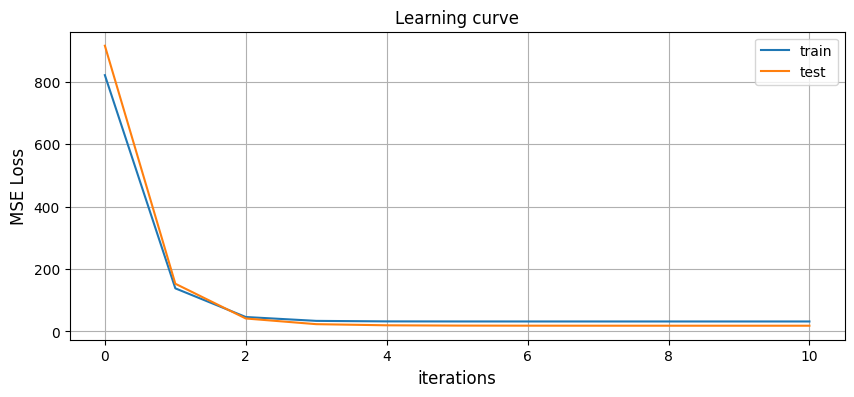

In [93]:
plot_mse(mse_train, mse_test)

In [94]:
x_train[:, 1].reshape(-1,1).shape

(20, 1)

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train[:, 1].reshape(-1,1))
x_test_scaled = scaler.transform(x_test[:, 1].reshape(-1,1))

In [96]:
x_train_scaled = np.hstack((np.ones((len(x_train_scaled), 1)), x_train_scaled))
x_test_scaled = np.hstack((np.ones((len(x_test_scaled), 1)), x_test_scaled))

In [97]:
w = np.array([[57.0], [33.0]])
ws, prediction, mse_train, dmse_train, mse_test = gradient_descent(x_train_scaled, y_train, x_test_scaled, y_test, w, 0.35, iteration=10)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 1: b = 52.70, w = 26.86, Loss_train = 146.31, Loss_test = 108.53.
Iteration 2: b = 51.40, w = 25.01, Loss_train = 41.79, Loss_test = 21.10.
Iteration 3: b = 51.02, w = 24.46, Loss_train = 32.39, Loss_test = 17.36.
Iteration 4: b = 50.90, w = 24.29, Loss_train = 31.54, Loss_test = 18.27.
Iteration 5: b = 50.86, w = 24.24, Loss_train = 31.46, Loss_test = 18.72.
Iteration 6: b = 50.85, w = 24.23, Loss_train = 31.46, Loss_test = 18.88.
Iteration 7: b = 50.85, w = 24.23, Loss_train = 31.45, Loss_test = 18.92.
Iteration 8: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.
Iteration 9: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.
Iteration 10: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.


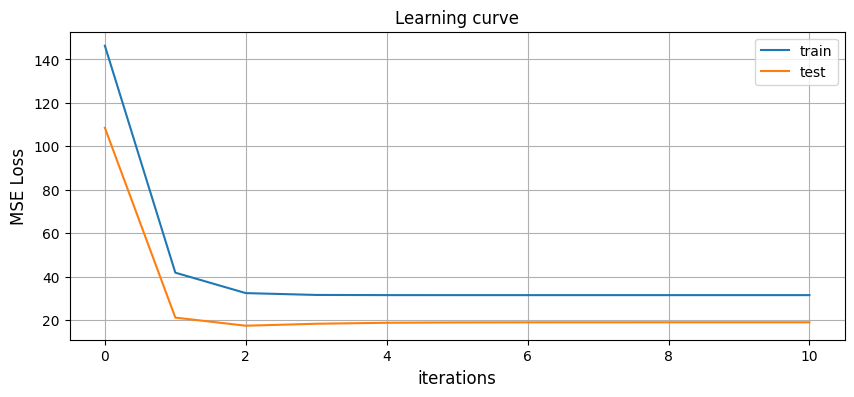

In [98]:
plot_mse(mse_train, mse_test)

Теперь нужно сделать поправку коэффициентов, учитывая, что мы нормировали данные.

In [99]:
b = ws[-1][0] - ws[-1][1] * scaler.mean_ / (scaler.var_) ** 0.5
w = ws[-1][1] / (scaler.var_) ** 0.5

print(f"y = {w[0]:.2f}x + {b[0]:.2f}")

y = 9.68x + 2.83


## Стохастический градиентный спуск

In [100]:
def stochastic_gradient_descent(x_train, y_train, x_test, y_test, w, alpha, iteration=10, batch_size=None):
    """Gradient descent for optimizing slope in simple linear regression"""

    ws = np.zeros((iteration + 1, 2))
    ws[0] = w[:, 0]
    mse_train = [mean_squared_error(y_train, x_train @ w)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, x_test @ w)]
    prediction = {(w[0][0], w[1][0]): x_train @ w}

    print(
        f"Iteration 0: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
        f"Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )

    for i in range(iteration):
        if not batch_size:
            x_sample = x_train
            y_sample = y_train
        else:
            indxs = np.random.choice(x_train.shape[0], batch_size)
            x_sample = x_train[indxs, :]
            y_sample = y_train[indxs, :]

        grad = gradient(x_sample, y_sample, w)
        w -= alpha * grad 

        ws[i + 1] = w[:, 0]
        mse_train.append(mean_squared_error(y_train, x_train @ w))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, x_test @ w))
        prediction[(w[0][0], w[1][0])] = x_train @ w
        if (i + 1) % 10 == 0:
            print(
                f"Iteration {i+1}: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
                f"Loss_train = {mse_train[i]:.2f}, "
                f"Loss_test = {mse_test[i]:3.2f}."
            )
    return ws, prediction, mse_train, dmse_train, mse_test

    

In [101]:
w = np.array([[57.0], [33.0]])
ws, prediction, mse_train, dmse_train, mse_test = stochastic_gradient_descent(x_train_scaled,y_train,x_test_scaled,y_test,w,0.02,iteration=100,batch_size=None)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 54.94, w = 30.06, Loss_train = 86.54, Loss_test = 55.92.
Iteration 20: b = 53.57, w = 28.10, Loss_train = 55.80, Loss_test = 30.94.
Iteration 30: b = 52.66, w = 26.80, Loss_train = 42.22, Loss_test = 21.36.
Iteration 40: b = 52.05, w = 25.94, Loss_train = 36.21, Loss_test = 18.09.
Iteration 50: b = 51.65, w = 25.36, Loss_train = 33.56, Loss_test = 17.29.
Iteration 60: b = 51.38, w = 24.98, Loss_train = 32.38, Loss_test = 17.36.
Iteration 70: b = 51.20, w = 24.73, Loss_train = 31.87, Loss_test = 17.68.
Iteration 80: b = 51.08, w = 24.56, Loss_train = 31.64, Loss_test = 18.01.
Iteration 90: b = 51.01, w = 24.45, Loss_train = 31.54, Loss_test = 18.28.
Iteration 100: b = 50.95, w = 24.37, Loss_train = 31.49, Loss_test = 18.49.


In [102]:
w = np.array([[57.0], [33.0]])
ws, prediction, mse_train, dmse_train, mse_test = stochastic_gradient_descent(x_train_scaled,y_train,x_test_scaled,y_test,w,0.02,iteration=100,batch_size=1)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 53.83, w = 28.97, Loss_train = 72.12, Loss_test = 43.70.
Iteration 20: b = 53.70, w = 28.40, Loss_train = 57.54, Loss_test = 32.50.
Iteration 30: b = 51.83, w = 25.47, Loss_train = 33.98, Loss_test = 17.59.
Iteration 40: b = 51.68, w = 24.99, Loss_train = 32.09, Loss_test = 17.70.
Iteration 50: b = 51.29, w = 24.32, Loss_train = 31.58, Loss_test = 19.49.
Iteration 60: b = 50.58, w = 23.91, Loss_train = 31.48, Loss_test = 19.28.
Iteration 70: b = 51.36, w = 24.13, Loss_train = 31.61, Loss_test = 18.37.
Iteration 80: b = 51.20, w = 24.62, Loss_train = 31.47, Loss_test = 18.76.
Iteration 90: b = 50.93, w = 24.60, Loss_train = 31.95, Loss_test = 17.58.
Iteration 100: b = 51.49, w = 23.48, Loss_train = 32.33, Loss_test = 19.82.


In [103]:
w = np.array([[57.0], [33.0]])
ws, prediction, mse_train, dmse_train, mse_test = stochastic_gradient_descent(x_train_scaled,y_train,x_test_scaled,y_test,w,0.02,iteration=100,batch_size=5)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 55.72, w = 30.24, Loss_train = 97.82, Loss_test = 66.42.
Iteration 20: b = 53.36, w = 27.65, Loss_train = 49.99, Loss_test = 26.78.
Iteration 30: b = 52.28, w = 26.60, Loss_train = 41.39, Loss_test = 20.71.
Iteration 40: b = 51.43, w = 26.21, Loss_train = 36.22, Loss_test = 17.86.
Iteration 50: b = 51.66, w = 25.71, Loss_train = 34.23, Loss_test = 17.30.
Iteration 60: b = 50.84, w = 24.99, Loss_train = 32.21, Loss_test = 17.55.
Iteration 70: b = 50.67, w = 24.65, Loss_train = 31.61, Loss_test = 18.73.
Iteration 80: b = 51.20, w = 25.21, Loss_train = 32.50, Loss_test = 17.29.
Iteration 90: b = 50.79, w = 24.75, Loss_train = 31.66, Loss_test = 18.19.
Iteration 100: b = 50.82, w = 24.47, Loss_train = 31.52, Loss_test = 18.42.
